In [1]:
import tweepy
import json
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, roc_curve, auc
import scikitplot as skplt
from sklearn import metrics
import seaborn as sns

In [2]:
# bot account training set
df_bots = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_3.csv/users.csv')
# human account training set
df_human = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/users.csv')


## Create Bot DataFrame

In [3]:
def mod_df(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'name',
     'screen_name',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     #'created_at',
     'timestamp',

            
        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add bot identifier
    df['bot']=1

   
    return df

In [4]:
# modify bot dataframe features
mod_bots_df = mod_df(df_bots[:400])

In [5]:
def get_frequency_bot(timestamp):
    bot_year = []
    for i in range(len(bot_time)):
        y = int(bot_time[i][:4])
        bot_year.append(y)

    bot_yrs = []
    for i in bot_year:
        yr = 2018 - i
        bot_yrs.append(yr)

    bot_count = mod_bots_df['statuses_count']

    bot_freq = []
    s=0
    for i in bot_count:
        ya = i/bot_yrs[s]
        s+=1
        bot_freq.append(ya)
    return bot_freq


In [6]:
# get bots timestamp
bot_time = mod_bots_df['timestamp']
# call timestamp to frequency function
bot_freq = get_frequency_bot(bot_time)
# add feautre to dataframe
mod_bots_df['status_frequency']=bot_freq

## Create Human Dataframe

In [7]:
def mod_df_human(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'name',
     'screen_name',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     #'created_at',
     'timestamp',

        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add human identifier
    df['bot']=0

    return df

In [8]:
def get_frequency_human(timestamp):
    #mod_hum_df['timestamp'][0][:4]
    hum_year = []
    for i in range(len(hum_time)):
        y = int(hum_time[i][:4])
        hum_year.append(y)
    hum_yrs = []
    for i in hum_year:
        ya = 2018 - i
        hum_yrs.append(ya)
    hum_count = mod_hum_df['statuses_count']
    hum_freq = []
    s=0
    for i in hum_count:
        ya = i/hum_yrs[s]
        s+=1
        hum_freq.append(ya)
    return hum_year

In [9]:
# remove undesireable features
mod_hum_df = mod_df_human(df_human[:400])


In [10]:
# get human timestamp
hum_time = mod_hum_df['timestamp']
# call timestamp to frequency function
hum_freq = get_frequency_human(hum_time)
# add feautre to dataframe
mod_hum_df['status_frequency']=hum_freq

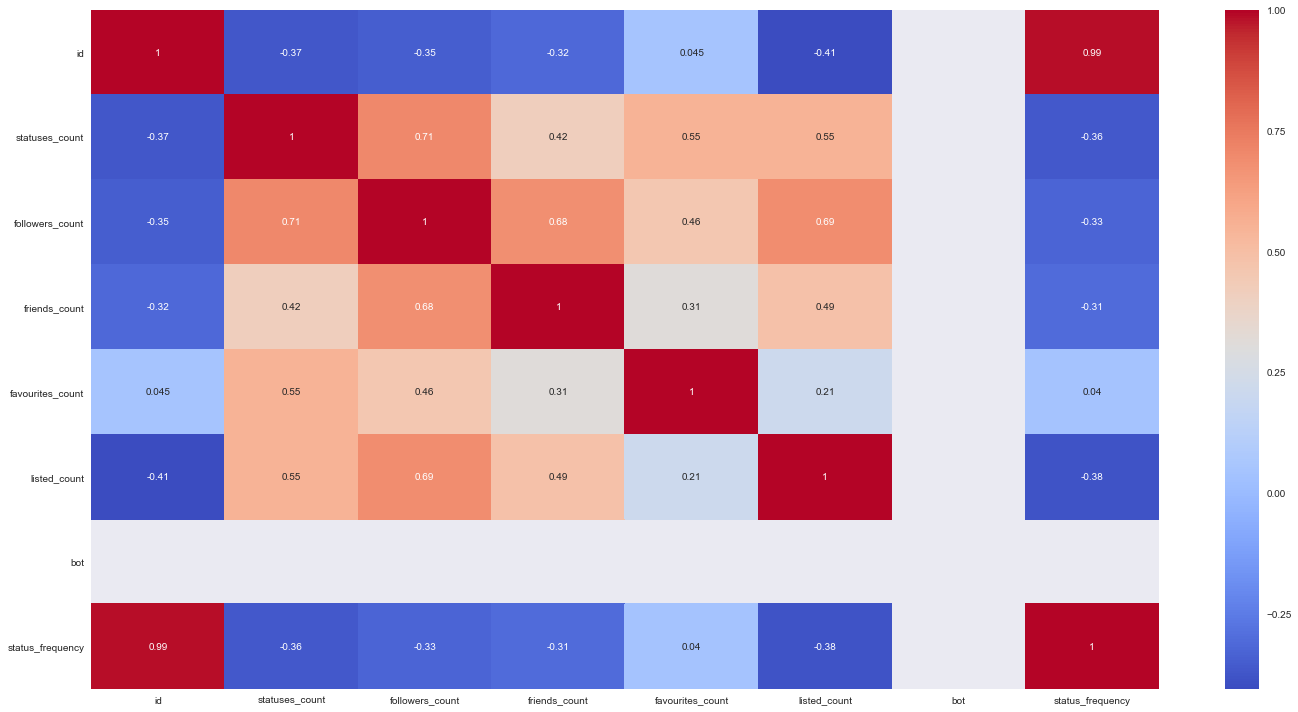

In [11]:
# view human features heatmap
plt.figure(figsize=(20,10))
sns.heatmap(mod_hum_df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Merge Dataframes

In [12]:
# create new dataframe
slick_frame = pd.DataFrame()

In [13]:
# merge  dataframes
def merge_df(df1, df2):
    # clean merged dataframe
    cat_frame = [df1, df2]
    concat_frame = pd.concat(cat_frame, ignore_index=True)
    
    return concat_frame
    

In [14]:
slick_frame = merge_df(mod_bots_df, mod_hum_df)

In [15]:
def mod_slick_df(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'status_frequency',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     'bot',


            
        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add bot identifier
  

   
    return df

In [16]:
slick_frame = mod_slick_df(slick_frame)

## Visualize Data

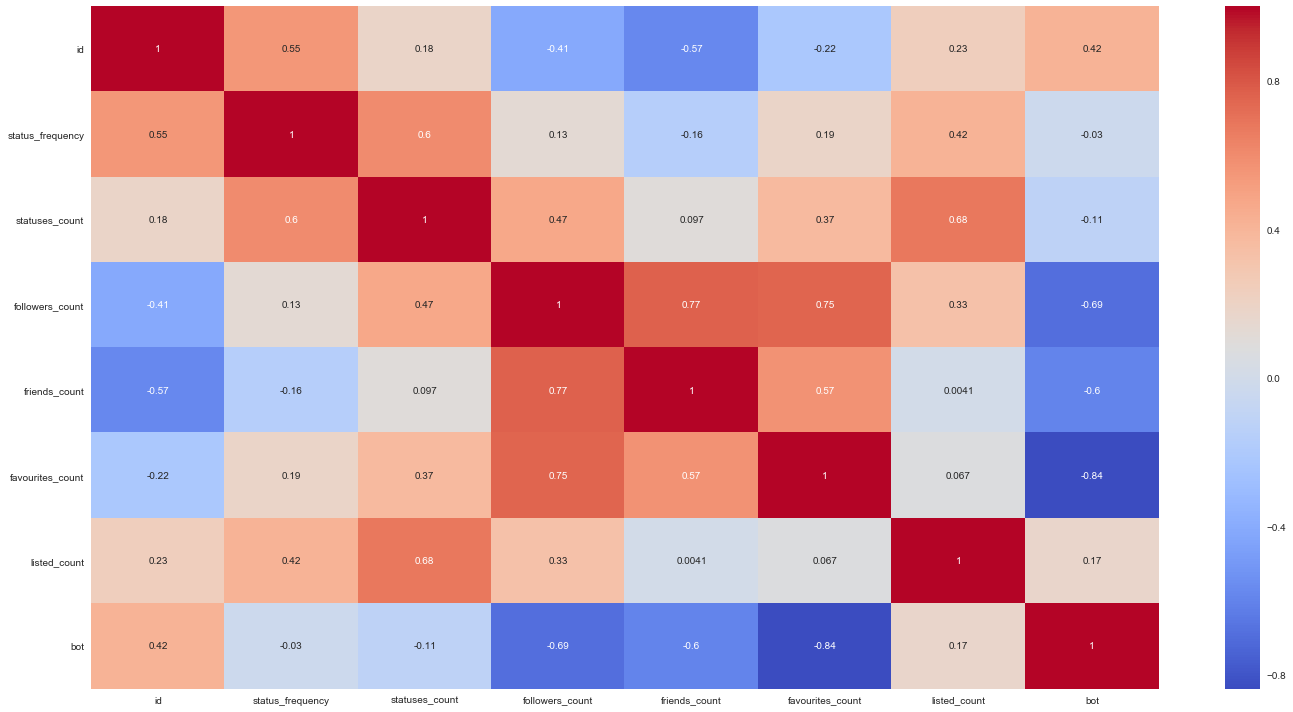

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(slick_frame.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [18]:
slick_frame.corr(method='spearman')

,id,status_frequency,statuses_count,followers_count,friends_count,favourites_count,listed_count,bot
id,1.000000,0.552502,0.182230,-0.409252,-0.573318,-0.215390,0.232410,0.416450
status_frequency,0.552502,1.000000,0.604629,0.128444,-0.156794,0.187123,0.417297,-0.030378
statuses_count,0.182230,0.604629,1.000000,0.470165,0.096915,0.371522,0.683816,-0.114365
followers_count,-0.409252,0.128444,0.470165,1.000000,0.768133,0.751369,0.325793,-0.689146
friends_count,-0.573318,-0.156794,0.096915,0.768133,1.000000,0.572685,0.004107,-0.596260
favourites_count,-0.215390,0.187123,0.371522,0.751369,0.572685,1.000000,0.067421,-0.837583
listed_count,0.232410,0.417297,0.683816,0.325793,0.004107,0.067421,1.000000,0.171016
bot,0.416450,-0.030378,-0.114365,-0.689146,-0.596260,-0.837583,0.171016,1.000000


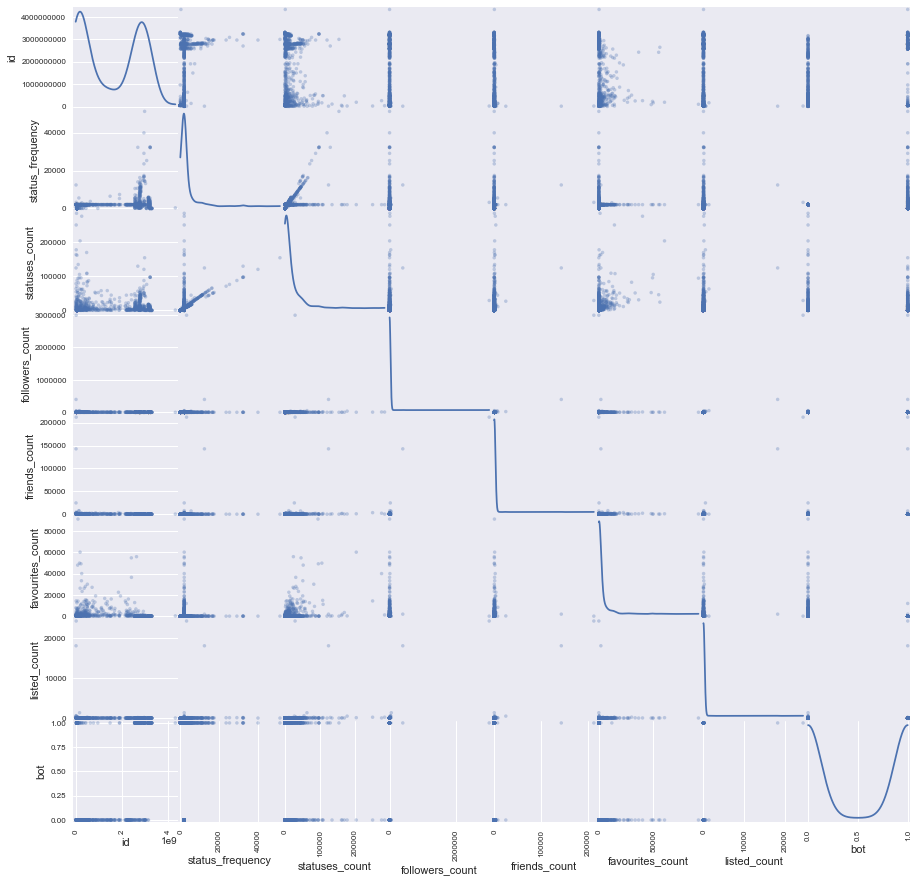

In [19]:
pd.scatter_matrix(slick_frame, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

## Model Selection

In [20]:
# get x and y
X = slick_frame.drop(['bot'], axis=1)
y = slick_frame['bot']

# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=slick_frame['bot'])


### DecisionTree

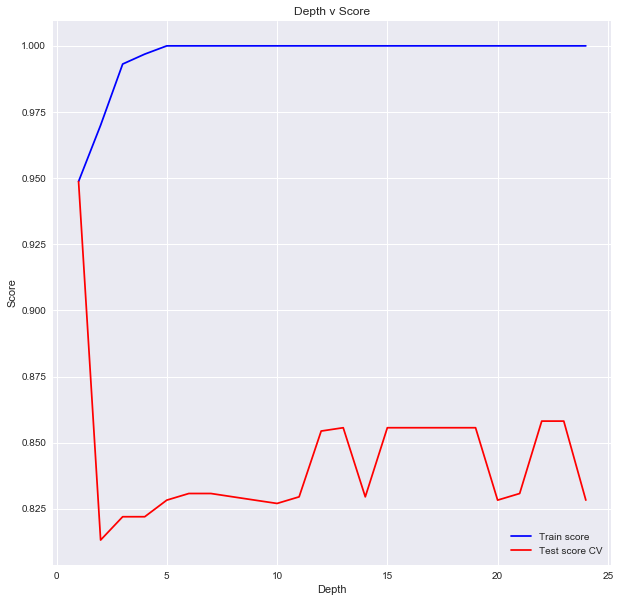

In [21]:
prange = np.arange(1, 25)

# tree predictions on scaled x values, and original/unscaled y values
training_scores, testing_scores = validation_curve(DecisionTreeClassifier()
                                                   ,X, y, 
                                                   param_name="max_depth", 
                                                   param_range=prange,
                                                   cv=3, 
                                                   scoring="accuracy", 
                                                   n_jobs=-1)
# mean and standard deviations
training_mean = np.mean(training_scores, axis=1)
training_std = np.std(training_scores, axis=1)
testing_mean = np.mean(testing_scores, axis=1)
testing_std = np.std(testing_scores, axis=1)

# Plot scores
plt.figure(figsize=(10,10))
plt.plot(prange, training_mean, label="Train score", color="blue")
plt.plot(prange, testing_mean, label="Test score CV", color="red")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Depth v Score")
plt.show()

### Random Forest

In [22]:
forest_reg = RandomForestClassifier(n_estimators=25, max_depth=5, criterion='entropy', 
                                    min_samples_leaf=10, min_samples_split=3)
forest_reg.fit(X_train, y_train)
pred_test = forest_reg.predict(X_test)
pred_train = forest_reg.predict(X_train)
print('Train score: ',forest_reg.score(X_train, y_train))
print('Test score: ',forest_reg.score(X_test, y_test))



Train score:  0.9875
Test score:  0.9875


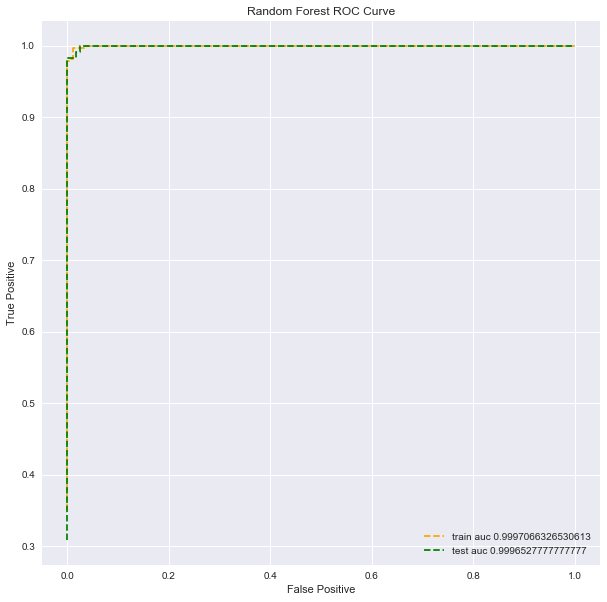

In [23]:
# ROC curve 
pred_train = forest_reg.predict_proba(X_train)
pred_test = forest_reg.predict_proba(X_test)

y_pred_train = []
y_pred_test = []
for i in range(len(pred_train)):
    y_pred_train.append(pred_train[i][1])

for i in range(len(pred_test)):
    y_pred_test.append(pred_test[i][1])
    
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test, pos_label=1)

auc_test = metrics.roc_auc_score(y_test, y_pred_test)
auc_train = metrics.roc_auc_score(y_train, y_pred_train)

plt.figure(figsize=(10,10))
plt.plot(fpr_train, tpr_train, color='orange', ls='--', label="train auc "+str(auc_train))
plt.plot(fpr_test, tpr_test, color='green', ls='--', label="test auc "+str(auc_test))
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()

### AdaBoost

In [24]:
# error calculation function
def calc_error(depth, X_test, y_test, X_train, y_train):
    bdt = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=depth),
        n_estimators=100,
        learning_rate=1.5,
        algorithm="SAMME")
    bdt.fit(X_train, y_train)

    ## plot test data
    errors = []
    # gets y predicted
    for i in bdt.staged_predict(X_test):
        # accuracy check
        errors.append(1. - accuracy_score(i, y_test))

    train_errors = []
    for i in bdt.staged_predict(X_train):
        train_errors.append(1. - accuracy_score(i, y_train))

    n_trees = len(bdt)
    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:

    est_errors = bdt.estimator_errors_[:n_trees]
    est_weights = bdt.estimator_weights_[:n_trees]
    
    return errors, train_errors

In [25]:
test2, train2 = calc_error(2, X_test, y_test, X_train, y_train)
test3, train3 = calc_error(3, X_test, y_test, X_train, y_train)
test4, train4 = calc_error(4, X_test, y_test, X_train, y_train)

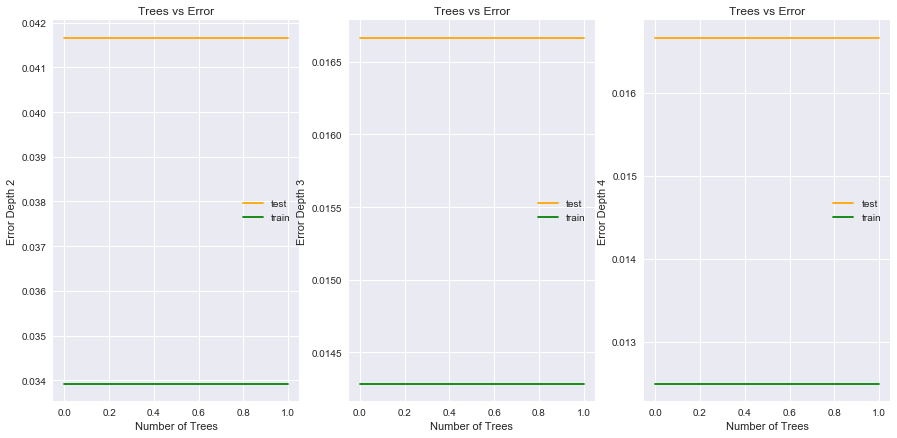

In [26]:

# plot figure
plt.figure(figsize=(15, 7))

#fig1
plt.subplot(131)
plt.plot(test2, c='orange', label='test')
plt.plot(train2, c='green', label='train')
plt.title('Trees vs Error')
plt.legend()
plt.ylabel('Error Depth 2')
plt.xlabel('Number of Trees')
plt.legend()

#fig2
plt.subplot(132)
plt.plot(test3, c='orange', label='test')
plt.plot(train3, c='green', label='train')
plt.title('Trees vs Error')
plt.legend()
plt.ylabel('Error Depth 3')
plt.xlabel('Number of Trees')
plt.legend()

#fig3
plt.subplot(133)
plt.plot(test4, c='orange', label='test')
plt.plot(train4, c='green', label='train')
plt.title('Trees vs Error')
plt.ylabel('Error Depth 4')
plt.xlabel('Number of Trees')
plt.legend()



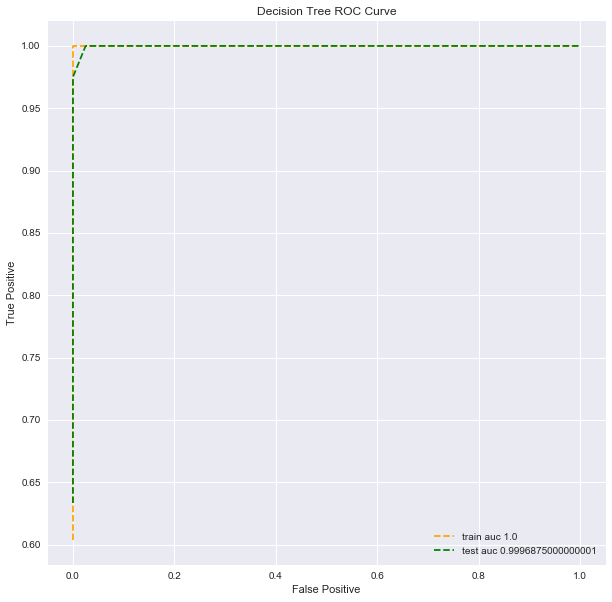

In [27]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=100,
    learning_rate=1.5,
    algorithm="SAMME")
bdt.fit(X_train, y_train)

# ROC curve 
pred_train = bdt.predict_proba(X_train)
pred_test = bdt.predict_proba(X_test)

y_pred_train = []
y_pred_test = []
for i in range(len(pred_train)):
    y_pred_train.append(pred_train[i][1])

for i in range(len(pred_test)):
    y_pred_test.append(pred_test[i][1])
    
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train, pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test, pos_label=1)

auc_test = metrics.roc_auc_score(y_test, y_pred_test)
auc_train = metrics.roc_auc_score(y_train, y_pred_train)

plt.figure(figsize=(10,10))
plt.plot(fpr_train, tpr_train, color='orange', ls='--', label="train auc "+str(auc_train))
plt.plot(fpr_test, tpr_test, color='green', ls='--', label="test auc "+str(auc_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()